In [51]:
# Importing Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn

In [139]:
print(sklearn.__version__)

1.2.2


In [3]:
# Using Ydata-Profiling
!pip install ydata-profiling

In [4]:
from ydata_profiling import ProfileReport

In [13]:
df = pd.read_excel("Student-100.xlsx")

In [14]:
profile = ProfileReport(df,title="ProfileReport")

In [16]:
profile.to_file(output_file='output.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [115]:
df.head(5)

,PHYSICS,Maths_,EE,PPS,EVS
0,15,18,20,20,17.0
1,11,20,19,15,4.0
2,11,16,15,11,11.5
3,8,14,8,18,14.5
4,11,10,14,10,3.5


In [18]:
# Removing Columns 
Columns_to_drop = ["S.NO","Roll No.","BRANCH","SEC.","Group","NAME"]

In [19]:
df = df.drop(columns= Columns_to_drop ,axis=1)

In [20]:
df.sample(5)

,PHYSICS,Maths_,EE,PPS,EVS,Tot,%
122,13,9,9,2,10.0,44.6,44.6
228,0,0,0,0,0.0,0.0,0.0
107,0,7,0,5,4.5,34.5,34.5
5,7,13,15,13,0.0,48.0,48.0
229,0,0,0,0,0.0,0.0,0.0


In [21]:
df

,PHYSICS,Maths_,EE,PPS,EVS,Tot,%
0,15,18,20,20,17.0,90.0,90.0
1,11,20,19,15,4.0,69.0,69.0
2,11,16,15,11,11.5,64.5,64.5
3,8,14,8,18,14.5,62.5,62.5
4,11,10,14,10,3.5,48.5,48.5
...,...,...,...,...,...,...,...
225,5,0,0,0,9.0,14.4,14.4
226,0,0,0,0,0.0,0.0,0.0
227,0,0,0,0,0.0,0.0,0.0
228,0,0,0,0,0.0,0.0,0.0


In [22]:
# Plotting Correlation Matrix
df.corr()

,PHYSICS,Maths_,EE,PPS,EVS,Tot,%
PHYSICS,1.000000,0.706936,0.744692,0.675271,0.725035,0.896795,0.896795
Maths_,0.706936,1.000000,0.631668,0.617141,0.729206,0.855862,0.855862
EE,0.744692,0.631668,1.000000,0.706852,0.653595,0.862645,0.862645
PPS,0.675271,0.617141,0.706852,1.000000,0.589717,0.812972,0.812972
EVS,0.725035,0.729206,0.653595,0.589717,1.000000,0.849502,0.849502
Tot,0.896795,0.855862,0.862645,0.812972,0.849502,1.000000,1.000000
%,0.896795,0.855862,0.862645,0.812972,0.849502,1.000000,1.000000


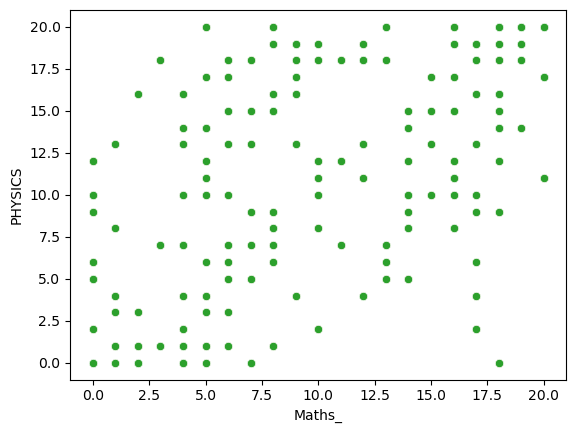

In [43]:
# Scatter Plot 
%matplotlib inline
sns.scatterplot(data=df,x="Maths_",y="PHYSICS")
plt.show()

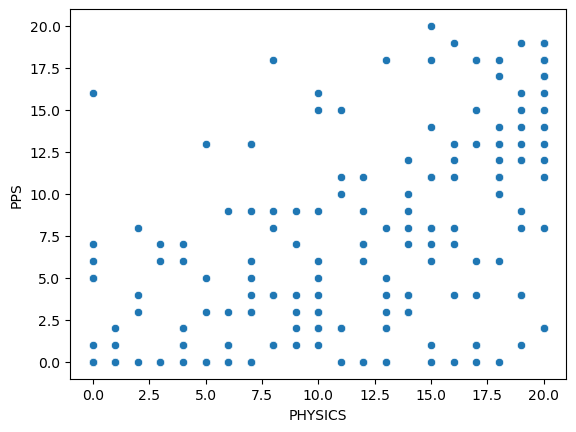

In [136]:
%matplotlib inline
sns.scatterplot(data=df,x="PHYSICS",y="PPS")
plt.show()

In [50]:
df

,PHYSICS,Maths_,EE,PPS,EVS,Tot,%
0,15,18,20,20,17.0,90.0,90.0
1,11,20,19,15,4.0,69.0,69.0
2,11,16,15,11,11.5,64.5,64.5
3,8,14,8,18,14.5,62.5,62.5
4,11,10,14,10,3.5,48.5,48.5
...,...,...,...,...,...,...,...
225,5,0,0,0,9.0,14.4,14.4
226,0,0,0,0,0.0,0.0,0.0
227,0,0,0,0,0.0,0.0,0.0
228,0,0,0,0,0.0,0.0,0.0


In [53]:
df = df.drop(columns=["Tot","%"],axis=1)

In [54]:
df

,PHYSICS,Maths_,EE,PPS,EVS
0,15,18,20,20,17.0
1,11,20,19,15,4.0
2,11,16,15,11,11.5
3,8,14,8,18,14.5
4,11,10,14,10,3.5
...,...,...,...,...,...
225,5,0,0,0,9.0
226,0,0,0,0,0.0
227,0,0,0,0,0.0
228,0,0,0,0,0.0


In [75]:
y = df["PPS"]
X = df.drop(columns=["PPS"],axis=1)

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR

In [77]:
# Train-Test-Split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [78]:
X_train

,PHYSICS,Maths_,EE,EVS
8,5,13,10,5.0
168,20,19,19,16.0
61,15,16,15,18.5
200,8,16,6,12.0
162,0,0,0,0.0
...,...,...,...,...
83,17,9,20,17.5
114,0,0,0,8.0
167,20,19,20,19.0
229,0,0,0,0.0


In [79]:
y_train

8      13
168    14
61     18
200     8
162     0
       ..
83      0
114     0
167    13
229     0
219     4
Name: PPS, Length: 184, dtype: int64

In [80]:
# Performorming Standardization
scaler = StandardScaler()

In [81]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train

In [83]:
scaler.transform(X_test)

array([[ 1.05130685,  1.58101222,  1.5645142 ,  0.84802124],
       [ 0.63708745, -0.55486332,  0.00385538,  0.46558029],
       [-0.32942449, -0.83964673,  0.85512383, -1.29364808],
       [ 0.77516058, -0.41247162,  0.71324575,  1.00099762],
       [ 1.32745311,  0.01470349,  1.70639227,  0.46558029],
       [ 1.46552625, -0.12768821,  0.71324575, -1.29364808],
       [-0.32942449, -0.41247162,  0.4294896 , -0.06983704],
       [-0.88171702, -0.98203843, -1.13116921, -1.29364808],
       [-1.15786329, -1.12443013, -1.13116921, -0.06983704],
       [ 0.91323371,  1.29622882,  1.70639227,  1.38343857],
       [ 0.08479491,  0.86905371, -1.13116921,  0.69504486],
       [ 1.46552625,  1.29622882,  0.9970019 ,  1.45992676],
       [ 1.18937998,  0.01470349,  0.9970019 ,  0.00665115],
       [-1.29593642, -0.27007992, -0.70553499, -1.29364808],
       [-1.29593642, -1.26682184, -1.13116921, -1.29364808],
       [-0.19135135,  0.72666201, -0.27990077, -0.06983704],
       [ 1.32745311,  1.

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
# LINEAR REGRESSION
model = LinearRegression()

In [86]:
model.fit(X_train,y_train)

LinearRegression()

In [90]:
y_pred = model.predict(X_test)

In [91]:
accuracy = r2_score(y_test,y_pred)

In [92]:
accuracy

0.5754583331850898

In [96]:
# RANDOM FOREST REGRESSOR 
model2 = RandomForestRegressor()

In [97]:
model2.fit(X_train,y_train)

RandomForestRegressor()

In [99]:
y_pred2 = model2.predict(X_test)

In [100]:
accuracy2 = r2_score(y_test,y_pred2)

In [101]:
accuracy2

0.6151201316786901

In [103]:
# SVM REGRESSION
model3 = LinearSVR()

In [104]:
model3.fit(X_train,y_train)

C:\Users\Shubham\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [105]:
y_pred3 = model3.predict(X_test)

In [106]:
accuracy3 = r2_score(y_pred3,y_test)

In [107]:
accuracy3

0.40911976972888175

In [109]:
# Importing the model 
import pickle
pickle_out = open("PPS.pkl","wb")
pickle.dump(model2, pickle_out)
pickle_out.close()

In [110]:
# Running an inference 
import numpy as np 

In [137]:
model2.predict([[19,19.5,19,19]]).reshape(-1,1)

C:\Users\Shubham\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([[14.99]])